In [42]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
%matplotlib inline

In [43]:
def make_labels(ax, boxplot):
    caps = boxplot['caps']
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]
    
    result = []
    result.append(capbottom)
    result.append(captop)
    
    return result

In [44]:
MN_preproc = []
R50_preproc = []
R101_preproc = []
X101_preproc = []

MN_backbone = []
R50_backbone = []
R101_backbone = []
X101_backbone = []

MN_head = []
R50_head = []
R101_head = []
X101_head = []

MN_postproc = []
R50_postproc = []
R101_postproc = []
X101_postproc = []

MN_total = []
R50_total = []
R101_total = []
X101_total = []

forward_pass_MN = []
forward_pass_R50 = []
forward_pass_R101 = []
forward_pass_X101 = []

In [46]:
MN_preproc = np.loadtxt("logs/pre_MN.txt", delimiter='\n', dtype=np.float)
R50_preproc = np.loadtxt("logs/pre_R50.txt", delimiter='\n', dtype=np.float)
R101_preproc = np.loadtxt("logs/pre_R101.txt", delimiter='\n', dtype=np.float)
X101_preproc = np.loadtxt("logs/pre_X101.txt", delimiter='\n', dtype=np.float)

MN_backbone = np.loadtxt("logs/b_MN.txt", delimiter='\n', dtype=np.float)
R50_backbone = np.loadtxt("logs/b_R50.txt", delimiter='\n', dtype=np.float)
R101_backbone = np.loadtxt("logs/b_R101.txt", delimiter='\n', dtype=np.float)
X101_backbone = np.loadtxt("logs/b_X101.txt", delimiter='\n', dtype=np.float)

MN_head = np.loadtxt("logs/head_MN.txt", delimiter='\n', dtype=np.float)
R50_head = np.loadtxt("logs/head_R50.txt", delimiter='\n', dtype=np.float)
R101_head = np.loadtxt("logs/head_R101.txt", delimiter='\n', dtype=np.float)
X101_head = np.loadtxt("logs/head_X101.txt", delimiter='\n', dtype=np.float)

MN_postproc = np.loadtxt("logs/post_MN.txt", delimiter='\n', dtype=np.float)
R50_postproc = np.loadtxt("logs/post_R50.txt", delimiter='\n', dtype=np.float)
R101_postproc = np.loadtxt("logs/post_R101.txt", delimiter='\n', dtype=np.float)
X101_postproc = np.loadtxt("logs/post_X101.txt", delimiter='\n', dtype=np.float)

MN_total = np.loadtxt("logs/total_MN.txt", delimiter='\n', dtype=np.float)
R50_total = np.loadtxt("logs/total_R50.txt", delimiter='\n', dtype=np.float)
R101_total = np.loadtxt("logs/total_R101.txt", delimiter='\n', dtype=np.float)
X101_total = np.loadtxt("logs/total_X101.txt", delimiter='\n', dtype=np.float)

## Preprocessing

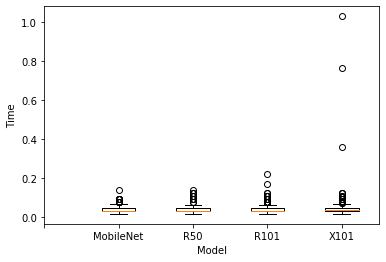

[0.03662767012515622, 0.037688559477844726, 0.037705458969051725, 0.03813699028656417]


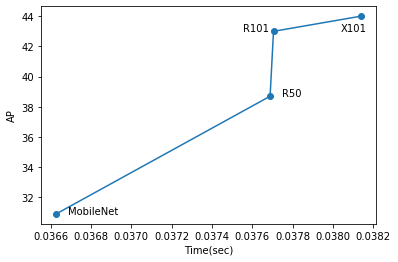

In [50]:
data = [MN_preproc, R50_preproc, R101_preproc, X101_preproc]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(MN_preproc)):
    if ((MN_preproc[i] >= bottom[0]) and (MN_preproc[i] <= top[0])):
        fpMN.append(MN_preproc[i])


fpR50 = []
for i in range(len(R50_preproc)):
    if ((R50_preproc[i] >= bottom[1]) and (R50_preproc[i] <= top[1])):
        fpR50.append(R50_preproc[i])


fpR101 = []
for i in range(len(R101_preproc)):
    if ((R101_preproc[i] >= bottom[2]) and (R101_preproc[i] <= top[2])):
        fpR101.append(R101_preproc[i])


fpX101 = []
for i in range(len(X101_preproc)):
    if ((X101_preproc[i] >= bottom[3]) and (X101_preproc[i] <= top[3])):
        fpX101.append(X101_preproc[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)
  
table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x']+0.00006 ,df['MobileNet']['y']))
plt.annotate('R50', xy=(df['R50']['x']+0.00006 ,df['R50']['y'] ))
plt.annotate('R101', xy=(df['R101']['x']-0.00015,df['R101']['y']))
plt.annotate('X101', xy=(df['X101']['x'] -0.0001,df['X101']['y']-1))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()

## Backbone

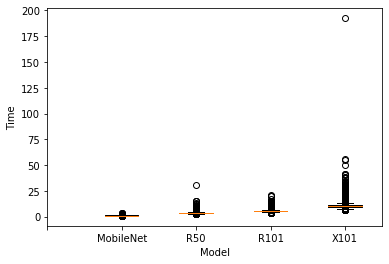

[1.0336786953425903, 3.43914643993296, 5.283871032003292, 10.49450851627868]


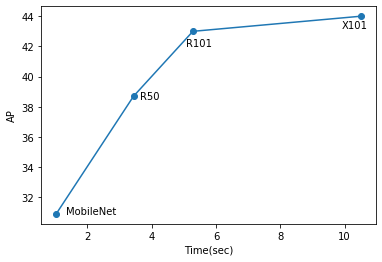

In [51]:
data = [MN_backbone, R50_backbone, R101_backbone, X101_backbone]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(MN_backbone)):
    if ((MN_backbone[i] >= bottom[0]) and (MN_backbone[i] <= top[0])):
        fpMN.append(MN_backbone[i])


fpR50 = []
for i in range(len(R50_backbone)):
    if ((R50_backbone[i] >= bottom[1]) and (R50_backbone[i] <= top[1])):
        fpR50.append(R50_backbone[i])


fpR101 = []
for i in range(len(R101_backbone)):
    if ((R101_backbone[i] >= bottom[2]) and (R101_backbone[i] <= top[2])):
        fpR101.append(R101_backbone[i])


fpX101 = []
for i in range(len(X101_backbone)):
    if ((X101_backbone[i] >= bottom[3]) and (X101_backbone[i] <= top[3])):
        fpX101.append(X101_backbone[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)
table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x'] + 0.3,df['MobileNet']['y']))
plt.annotate('R50', xy=(df['R50']['x'] + 0.2,df['R50']['y'] - 0.2))
plt.annotate('R101', xy=(df['R101']['x'] -0.2,df['R101']['y']-0.97))
plt.annotate('X101', xy=(df['X101']['x'] - 0.6,df['X101']['y']- 0.8))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()

## Head

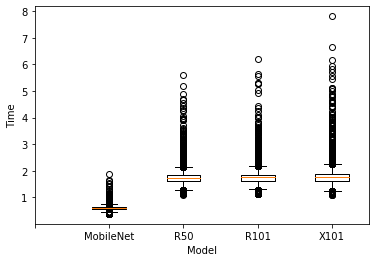

[0.6002004922382416, 1.7167819011323733, 1.7407145542160078, 1.7445785134807261]


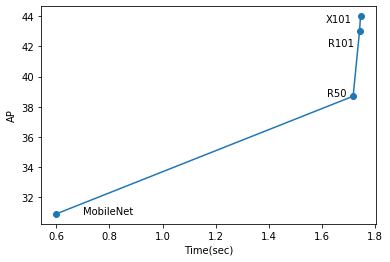

In [52]:
data = [MN_head, R50_head, R101_head, X101_head]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(MN_head)):
    if ((MN_head[i] >= bottom[0]) and (MN_head[i] <= top[0])):
        fpMN.append(MN_head[i])


fpR50 = []
for i in range(len(R50_head)):
    if ((R50_head[i] >= bottom[1]) and (R50_head[i] <= top[1])):
        fpR50.append(R50_head[i])


fpR101 = []
for i in range(len(R101_head)):
    if ((R101_head[i] >= bottom[2]) and (R101_head[i] <= top[2])):
        fpR101.append(R101_head[i])


fpX101 = []
for i in range(len(X101_head)):
    if ((X101_head[i] >= bottom[3]) and (X101_head[i] <= top[3])):
        fpX101.append(X101_head[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)

table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x'] + 0.1,df['MobileNet']['y']))
plt.annotate('R50', xy=(df['R50']['x'] -0.1,df['R50']['y'] ))
plt.annotate('R101', xy=(df['R101']['x'] -0.12,df['R101']['y']-0.97))
plt.annotate('X101', xy=(df['X101']['x'] - 0.13,df['X101']['y']- 0.4))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()

## Postprocessing

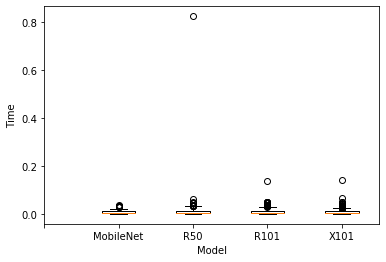

[0.0060786422402496374, 0.00728088713877663, 0.007158740535183218, 0.006684463803168897]


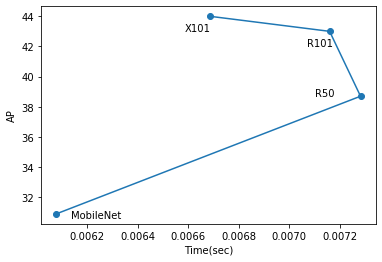

In [53]:
data = [MN_postproc, R50_postproc, R101_postproc, X101_postproc]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(MN_postproc)):
    if ((MN_postproc[i] >= bottom[0]) and (MN_postproc[i] <= top[0])):
        fpMN.append(MN_postproc[i])


fpR50 = []
for i in range(len(R50_postproc)):
    if ((R50_postproc[i] >= bottom[1]) and (R50_postproc[i] <= top[1])):
        fpR50.append(R50_postproc[i])


fpR101 = []
for i in range(len(R101_postproc)):
    if ((R101_postproc[i] >= bottom[2]) and (R101_postproc[i] <= top[2])):
        fpR101.append(R101_postproc[i])


fpX101 = []
for i in range(len(X101_postproc)):
    if ((X101_postproc[i] >= bottom[3]) and (X101_postproc[i] <= top[3])):
        fpX101.append(X101_postproc[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)
  
table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x']+0.00006 ,df['MobileNet']['y']-0.3))
plt.annotate('R50', xy=(df['R50']['x'] -0.00018,df['R50']['y'] ))
plt.annotate('R101', xy=(df['R101']['x']-0.00009,df['R101']['y']-1))
plt.annotate('X101', xy=(df['X101']['x'] -0.0001,df['X101']['y']-1))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()

## Total

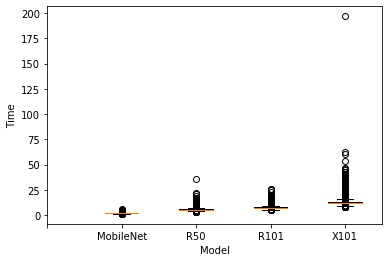

[1.6800949503668539, 5.225891211508204, 7.045833518312985, 12.292692392991794]


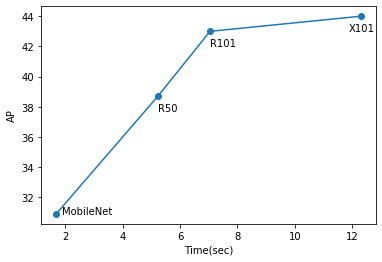

In [54]:
data = [MN_total, R50_total, R101_total, X101_total]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(MN_total)):
    if ((MN_total[i] >= bottom[0]) and (MN_total[i] <= top[0])):
        fpMN.append(MN_total[i])


fpR50 = []
for i in range(len(R50_total)):
    if ((R50_total[i] >= bottom[1]) and (R50_total[i] <= top[1])):
        fpR50.append(R50_total[i])


fpR101 = []
for i in range(len(R101_total)):
    if ((R101_total[i] >= bottom[2]) and (R101_total[i] <= top[2])):
        fpR101.append(R101_total[i])


fpX101 = []
for i in range(len(X101_total)):
    if ((X101_total[i] >= bottom[3]) and (X101_total[i] <= top[3])):
        fpX101.append(X101_total[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)
  
table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x']+0.2 ,df['MobileNet']['y']))
plt.annotate('R50', xy=(df['R50']['x']+0.00006 ,df['R50']['y'] -1))
plt.annotate('R101', xy=(df['R101']['x']-0.00015,df['R101']['y']-1))
plt.annotate('X101', xy=(df['X101']['x'] -0.4,df['X101']['y']-1))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()

## Forward pass

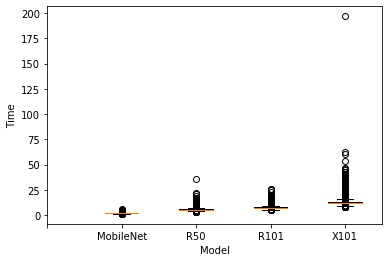

[1.6451310724440114, 5.18556585604046, 7.038664998282257, 12.25723336867846]


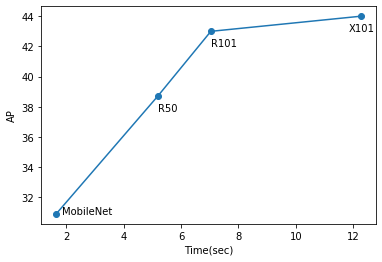

In [55]:
for i in range(0, 5000):
    forward_pass_MN.append(MN_head[i] + MN_backbone[i])
    forward_pass_R50.append(R50_head[i] + R50_backbone[i])
    forward_pass_R101.append(R101_head[i] + R101_backbone[i])
    forward_pass_X101.append(X101_head[i] + X101_backbone[i])
    
data = [MN_total, R50_total, R101_total, X101_total]
fix, ax = plt.subplots()
ax.boxplot(data)
plt.xlabel(u'Model')
plt.ylabel(u'Time')
xticks(range(5), ['','MobileNet', 'R50', 'R101', 'X101'])
plt.show()
bottom = []
top = []
for i in range(4):
    my_boxes = ax.boxplot(data[i])
    result = make_labels(ax, my_boxes)
    bottom.append(result[0])
    top.append(result[1])
fpMN = []
for i in range(len(forward_pass_MN)):
    if ((forward_pass_MN[i] >= bottom[0]) and (forward_pass_MN[i] <= top[0])):
        fpMN.append(forward_pass_MN[i])


fpR50 = []
for i in range(len(forward_pass_R50)):
    if ((forward_pass_R50[i] >= bottom[1]) and (forward_pass_R50[i] <= top[1])):
        fpR50.append(forward_pass_R50[i])


fpR101 = []
for i in range(len(forward_pass_R101)):
    if ((forward_pass_R101[i] >= bottom[2]) and (forward_pass_R101[i] <= top[2])):
        fpR101.append(forward_pass_R101[i])


fpX101 = []
for i in range(len(forward_pass_X101)):
    if ((forward_pass_X101[i] >= bottom[3]) and (forward_pass_X101[i] <= top[3])):
        fpX101.append(forward_pass_X101[i])

        
middle_fp = [sum(fpMN)/len(fpMN), sum(fpR50)/len(fpR50), sum(fpR101)/len(fpR101), sum(fpX101)/len(fpX101)]
print(middle_fp)

  
table = [
    middle_fp,
    [30.9,38.7,43,44],
    ['MobileNet','R50','R101', 'X101']
]
  
df = pd.DataFrame(table, index=['x','y','Точка'], columns=['MobileNet','R50','R101', 'X101'])
  
X = [x for x in df.loc['x']]
Y = [y for y in df.loc['y']]
  
plt.plot(X, Y, marker='o');
plt.annotate('MobileNet', xy=(df['MobileNet']['x']+0.2 ,df['MobileNet']['y']))
plt.annotate('R50', xy=(df['R50']['x']+0.00006 ,df['R50']['y'] -1))
plt.annotate('R101', xy=(df['R101']['x']-0.00015,df['R101']['y']-1))
plt.annotate('X101', xy=(df['X101']['x'] -0.4,df['X101']['y']-1))
plt.xlabel(u'Time(sec)')
plt.ylabel(u'AP')
plt.show()